In [47]:
## 对文件summerOly_athletes.csv清洗后的文件athletes_data.csv中的数据进行初步处理
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

data = pd.read_csv("athletes_data.csv")
data.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [48]:
names = set(data["Name"])
nocs = set(data["NOC"])
events = set(data["Event"])

In [49]:
names_g = data.groupby("Name")
personal_data = {
    "Name": [],
    "NOC": [],
    "Gold": [],
    "Silver": [],
    "Bronze": [],
    "Medal": [],
}
for n in names:
    # print(n)
    tem = names_g.get_group(n)
    # print(tem)
    Gold_num = 0  # 该队员的金牌数
    Silver_num = 0  # 该队员的银牌数
    Bronze_num = 0  # 该队员的铜牌数
    for j in tem["Medal"]:
        if j == "Gold":
            Gold_num += 1
        elif j == "Silver":
            Silver_num += 1
        elif j == "Bronze":
            Bronze_num += 1
    personal_data["Name"].append(n)
    personal_data["NOC"].append(tem["NOC"].iloc[0])
    personal_data["Gold"].append(Gold_num)
    personal_data["Silver"].append(Silver_num)
    personal_data["Bronze"].append(Bronze_num)
    personal_data["Medal"].append(Gold_num + Silver_num + Bronze_num)

personal_data = pd.DataFrame(personal_data)
personal_data.head()

,Name,NOC,Gold,Silver,Bronze,Medal
0,Antje Seydlitz-kurzbach,CAN,0,0,0,0
1,Kjell-ke Nilsson,SWE,0,0,0,0
2,li Smaylov,AZE,0,0,0,0
3,Richard Gilbert,USA,0,0,0,0
4,William Robbins,USA,0,0,0,0


In [50]:
personal_data.to_csv("personal_data.csv")

In [51]:
## 对国家进行分类
## （1） 参加比赛次数超过10次的国家
## （2） 参加比赛次数小于10次的国家
## （3） 参加比赛次数仅一两次的国家
## 其它因素对国家奖牌数量的影响：
## （1） 东道主效应
## （2） 伟大教练

In [52]:
# 现进行国家分类

# 1 从运动员数据中获得国家列表
nocs
# 2 从运动员数据中获得每一届的参赛国家
# 先按照年份进行分类
years_g = data.groupby("Year")
years = set(data["Year"])
join_countrys = {i: list() for i in years}
for year in years:
    this_year = years_g.get_group(year)
    for j in this_year["NOC"]:
        # print(type(j))
        # print(type(join_countrys[year]))
        # print(type(join_countrys))
        # print(type(year))
        if j not in join_countrys[year]:
            join_countrys[year].append(j)
print(join_countrys)

{1920: ['DEN', 'FIN', 'NOR', 'EGY', 'GBR', 'SWE', 'ESP', 'USA', 'SUI', 'BEL', 'FRA', 'ITA', 'LUX', 'BRA', 'GRE', 'TCH', 'IND', 'MON', 'CHI', 'CAN', 'AUS', 'NED', 'RSA', 'POR', 'YUG', 'NZL', 'JPN', 'EST', 'ARG'], 1924: ['FIN', 'NOR', 'BUL', 'CHI', 'SUI', 'MON', 'GBR', 'FRA', 'BEL', 'HUN', 'POL', 'AUT', 'SWE', 'NED', 'EGY', 'MEX', 'ARG', 'TUR', 'ITA', 'USA', 'CUB', 'ESP', 'LUX', 'GRE', 'DEN', 'URU', 'AUS', 'TCH', 'LTU', 'EST', 'LAT', 'YUG', 'HAI', 'ROU', 'CAN', 'RSA', 'IRL', 'POR', 'BRA', 'JPN', 'IND', 'NZL', 'ECU', 'PHI', 'RUS'], 1928: ['NOR', 'EGY', 'USA', 'IND', 'SUI', 'GER', 'GBR', 'CAN', 'SWE', 'BEL', 'FRA', 'NED', 'ITA', 'MEX', 'FIN', 'DEN', 'JPN', 'LTU', 'ARG', 'ROU', 'ESP', 'CHI', 'LUX', 'POR', 'GRE', 'URU', 'AUT', 'IRL', 'POL', 'YUG', 'TCH', 'TUR', 'RSA', 'HUN', 'MON', 'CUB', 'LAT', 'ZIM', 'AUS', 'MLT', 'HAI', 'NZL', 'EST', 'PHI', 'PAN', 'BUL'], 1932: ['NED', 'USA', 'BEL', 'FRA', 'PHI', 'ITA', 'FIN', 'SWE', 'GBR', 'MEX', 'GER', 'IND', 'ESP', 'BRA', 'DEN', 'JPN', 'CAN', 'ARG', 'H

In [53]:
# 得到2028年可能参赛的国家有
join_country = join_countrys[2024]
# 3 利用data统计参赛国的的参赛次数
num_of_participate = {i: 0 for i in join_country}
# 按国家分类后依据是否有该国的成员来判断是否参了加本届奥运会并统计有多少次参加了奥运会
country_g = data.groupby("NOC")
for noc in join_country:
    country_participants = country_g.get_group(noc)
    num = len(set(country_participants["Year"]))
    num_of_participate[noc] = num

In [54]:
num_of_participate = pd.DataFrame(num_of_participate, index=[0])
num_of_participate

,ARM,COL,JAM,GAM,MEX,COM,IRQ,DJI,UAE,IRI,...,SAM,COD,SYR,PAN,SSD,NRU,PHI,SUI,PRK,SLO
0,8,22,19,11,25,8,16,10,11,19,...,11,12,15,19,3,8,23,31,11,9


In [55]:
# 进行分类
# 1 参加比赛次数超过10次的国家
country_10 = []
# 2 参加比赛次数小于10次大于5次的国家
country_5_10 = []
# 3 参加比赛次数小于5次的国家
country_1_5 = []


# 设立分类机
def classify_country(noc):
    if num_of_participate[noc].iloc[0] > 10:
        country_10.append(noc)
    elif num_of_participate[noc].iloc[0] > 5:
        country_5_10.append(noc)
    else:
        country_1_5.append(noc)


# 分类
for noc in join_country:
    classify_country(noc)
print(country_10)
print(country_5_10)
print(country_1_5)

['COL', 'JAM', 'GAM', 'MEX', 'IRQ', 'UAE', 'IRI', 'MAW', 'ARG', 'SGP', 'MAS', 'MTN', 'GAB', 'IND', 'ETH', 'CGO', 'PUR', 'ISV', 'JOR', 'OMA', 'GHA', 'LBA', 'ALG', 'CAY', 'GUY', 'ROU', 'BRN', 'CIV', 'BER', 'LUX', 'MAR', 'IRL', 'SUR', 'PAR', 'FRA', 'CUB', 'KUW', 'JPN', 'GER', 'BHU', 'BAN', 'CAM', 'AFG', 'LES', 'ISR', 'SWZ', 'GBR', 'SWE', 'VIE', 'MOZ', 'TPE', 'ITA', 'MLI', 'ESP', 'FIJ', 'CRC', 'UGA', 'BUL', 'MRI', 'BUR', 'GRN', 'BAR', 'SEY', 'MON', 'CYP', 'ANT', 'CHI', 'NIG', 'LIE', 'CHA', 'AUT', 'PER', 'SEN', 'QAT', 'BRA', 'NGR', 'BOL', 'BIZ', 'EGY', 'PAK', 'TUR', 'POL', 'MGL', 'BEN', 'ZIM', 'IVB', 'KOR', 'HUN', 'AND', 'GUI', 'ESA', 'SOL', 'THA', 'SUD', 'RSA', 'NOR', 'INA', 'KEN', 'DEN', 'RWA', 'ANG', 'TAN', 'EST', 'LTU', 'NZL', 'CHN', 'SMR', 'VEN', 'MLT', 'BEL', 'SOM', 'LBR', 'ZAM', 'AUS', 'KSA', 'TOG', 'DOM', 'SLE', 'HAI', 'FIN', 'BAH', 'TTO', 'USA', 'TUN', 'URU', 'MAD', 'CAF', 'POR', 'NEP', 'HKG', 'HON', 'PNG', 'ISL', 'ECU', 'SRI', 'NED', 'CAN', 'MYA', 'BOT', 'LAT', 'TGA', 'NCA', 'CMR'

In [56]:
# 奖牌预测准备；
## 导入数据
medal_counts = pd.read_csv("counts_data.csv")
medal_counts.head()

## 按照年份分类
years_g = medal_counts.groupby("Year")

In [ ]:
# 对于参加次数大于10的国家，采用朴素的时间序列算法预测奖牌数量
# 线性回归模型：
import statsmodels.api as sm


def fun(x, y):
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    results = model.fit()
    return results.params


Gold_num_list = []
Silver_num_list = []
Bronze_num_list = []
for noc in country_10:
    # 按照国家代码得到其奖牌获得情况，记录最近5届的奖牌数量
    Gold_num = [0] * 6
    Silver_num = [0] * 6
    Bronze_num = [0] * 6
    i = 0
    for year in range(2004, 2025, 4):
        year_data = years_g.get_group(year)  # 此届的获奖榜
        # 从获奖榜单中获得参加次数大于10的国家的获奖数量：
        if noc in list(year_data["NOC"]):
            p = np.array(list(year_data["NOC"]))

            g = year_data["Gold"]
            s = year_data["Silver"]
            b = year_data["Bronze"]
            Gold_num[i] = g[p == noc].iloc[0]
            Silver_num[i] = s[p == noc].iloc[0]
            Bronze_num[i] = b[p == noc].iloc[0]
        i += 1
    Gold_num_list.append(Gold_num)
    Silver_num_list.append(Silver_num)
    Bronze_num_list.append(Bronze_num)
# 向量化
print(Gold_num_list)
Gold_num_list = np.array(Gold_num_list)
Silver_num_list = np.array(Silver_num_list)
Bronze_num_list = np.array(Bronze_num_list)
medal_counts = Gold_num_list + Silver_num_list + Bronze_num_list
print(Gold_num_list.shape)


# 添加近五届的平均项目数量作为新特征
def get_ENAS() -> list:
    programs_data = pd.read_csv("programs_data.csv")
    ENAS = []
    for y in range(2004, 2025, 4):
        val = programs_data[str(y)].values
        val = val[val > 0]
        ENAS.append(val.mean())
    return ENAS


ENAS = get_ENAS()

# 将这五个特征与原特征合并
enas = np.array([ENAS] * (medal_counts.shape[0]))
print(f"medal_counts[:,:-1].shape={medal_counts[:,:-1].shape},enas.shape={enas.shape}")
x = np.hstack((medal_counts[:, :-1], enas))

# 用线性回归模型进行预测总奖牌数：
# 待预测的为2024年的奖牌数
y = medal_counts[:, -1]
y = np.reshape(y, (y.shape[0], 1))
# 数据结构检查
print(f"x.shape={x.shape},y.shape={y.shape}")

# 选取80%作为训练集测试集比例
number = [i for i in range(x.shape[0])]
random.shuffle(number)
up = int(len(number) * 0.8)
x = sm.add_constant(x)
x_train = x[number[0:up]]
y_train = y[number[0:up]]
x_test = x[number[up:]]
y_test = y[number[up:]]

# 线性回归
model = sm.OLS(y_train, x_train)
results = model.fit()
print(results.summary())
y_test_hat = results.predict(x_test)
MSE = np.mean((y_test_hat - y_test) ** 2)
print(f"MSE={MSE}")

[[0, 0, 1, 3, 0, 0], [2, 5, 4, 6, 4, 1], [0, 0, 0, 0, 0, 0], [0, 2, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [2, 1, 7, 3, 3, 3], [0, 0, 0, 0, 0, 0], [2, 2, 1, 3, 0, 1], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 1, 0], [2, 4, 3, 1, 1, 1], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [8, 4, 2, 1, 1, 3], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 1, 1], [0, 0, 1, 0, 2, 4], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [11, 7, 11, 10, 10, 16], [9, 3, 5, 5, 7, 2], [0, 0, 0, 0, 0, 0], [16, 9, 7, 12, 27, 20], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 2, 1], [0, 0, 0, 0, 0, 0], [9, 19, 29, 27, 22, 14], [4, 0, 1, 2, 3, 4], [0, 0, 0, 1, 0, 0], [0, 0

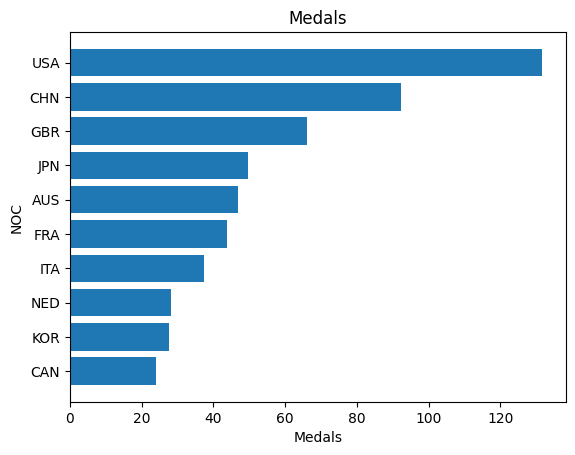

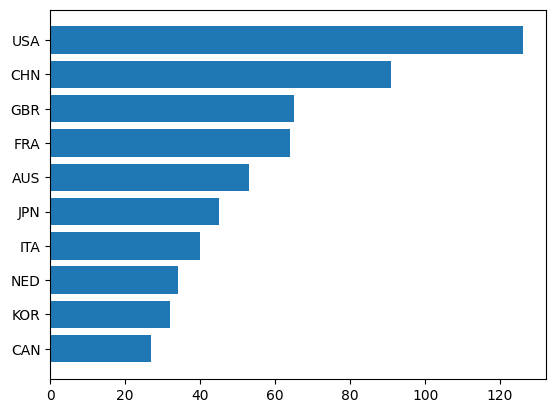

,NOC,Medals,NOC2,Medals2,Eorros
0,USA,131.644226,USA,126,-5.644226
1,CHN,92.218348,CHN,91,-1.218348
2,GBR,66.238040,GBR,65,-1.238040
3,JPN,49.662330,FRA,64,14.337670
4,AUS,46.977228,AUS,53,6.022772
5,FRA,43.926032,JPN,45,1.073968
6,ITA,37.303632,ITA,40,2.696368
7,NED,28.149778,NED,34,5.850222
8,KOR,27.527067,KOR,32,4.472933
9,CAN,24.043465,CAN,27,2.956535


In [180]:
hat_y = results.predict(x)
sorted_indices = np.argsort(hat_y)
country_10 = np.array(country_10)
cou = country_10[list(sorted_indices)]
plt.figure()
plt.barh(cou[::-1][0:10], sorted(hat_y)[::-1][0:10])
plt.xlabel("Medals")
plt.ylabel("NOC")
plt.title("Medals")
plt.gca().invert_yaxis()  # 反转 y 轴，确保从上到下是高到低
# 显示正确的2024年奖牌榜单
y = medal_counts[:, -1].flatten()
sorted_y = np.array(sorted(y))[::-1][0:10]
indices = np.argsort(y)[::-1]
cout = country_10[indices][0:10]
plt.figure()
plt.barh(cout, sorted_y)
plt.gca().invert_yaxis()  # 反转 y 轴，确保从上到下是高到低
plt.show()
df = {
    "NOC": cou[::-1][:10],
    "Medals": sorted(hat_y)[::-1][0:10],
    "NOC2": cout,
    "Medals2": sorted_y,
    "Eorros": sorted_y - sorted(hat_y)[::-1][0:10],
}
df = pd.DataFrame(df)
df